Sources: 
https://www.youtube.com/watch?v=bK_k7eebGgc&list=PLgNJO2hghbmhHuhURAGbe6KWpiYZt0AMH&index=1&pp=iAQB

https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pip in c:\users\prish\appdata\local\programs\python\python312\lib\site-packages (24.2)
  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2



In [4]:
pip install tensorflow==2.17.0 opencv-python matplotlib

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\prish\appdata\roaming\python\python312\site-packages (4.10.0.84)



In [6]:
#Import Standard Dependencies
import cv2
import os 
import random 
import numpy as np 
from matplotlib import pyplot as plt

In [7]:
plt.imshow??

Signature:
plt.imshow(
    X: 'ArrayLike | PIL.Image.Image',
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    *,
    aspect: "Literal['equal', 'auto'] | float | None" = None,
    interpolation: 'str | None' = None,
    alpha: 'float | ArrayLike | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    origin: "Literal['upper', 'lower'] | None" = None,
    extent: 'tuple[float, float, float, float] | None' = None,
    interpolation_stage: "Literal['data', 'rgba'] | None" = None,
    filternorm: 'bool' = True,
    filterrad: 'float' = 4.0,
    resample: 'bool | None' = None,
    url: 'str | None' = None,
    data=None,
    **kwargs,
) -> 'AxesImage'
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image, set up the colormapping using the parameters
``cmap='gray', vmin

In [19]:
# Import tensorflow dependencies - Functional API 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten 
import tensorflow as tf

In [20]:
#Model(inputs=[inputimage, verificationimage] ,outputs=[1,0]) 

In [21]:
#class L1Dist(Layer) 
# Performs inheritance for a custom neural network layer

In [22]:
# Avoid OOM error by setting GPU Memory Consumption Growth 

gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True) 

In [12]:
# Setup filepath for anchor and (positive and negative) verification images 
POS_PATH = os.path.join('data', 'positive') 
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [13]:
# Make the directories 
os.makedirs(POS_PATH) 
os.makedirs(NEG_PATH) 
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [14]:
# http://vis-www.cs.umass.edu/lfw/

In [15]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
# !tar -xf lfw.tgz

In [16]:
for directory in os.listdir('lfw'): 
    for file in os.listdir(os.path.join('lfw', directory)):
        print(file)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lfw'

In [ ]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'): 
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file) 
        os.replace(EX_PATH, NEW_PATH)

In [ ]:
# Import uuid library to generate unique image names 
import uuid # Universally unique identifiers

In [ ]:
uuid.uuid1()

In [17]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Collect Positive and Anchor Classes 
cap = cv2.VideoCapture(0) 

while cap.isOpened(): 
    # read the capture at a given point in time 
    ret, frame = cap.read() 

    # Cut down frame to 250x250px 
    frame = frame[120:120+250, 200:200+250, :]

    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'): 
        # Create the unique file path 
        # Append unique identifier to jpg 
        imgname = os.path.join(POS_PATH, '{}.jpg'. format(uuid.uuid1()))
        # Write out anchor image 
        cv2.imwrite(imgname, frame) 
        
    # Collect positives 
    if cv2.waitKey(1) & 0XFF == ord('p'): 
        # Create the unique file path 
        # Append unique identifier to jpg q
        imgname = os.path.join(POS_PATH, '{}.jpg', format(uuid.uuid1()))
        # Write out positive image 
        cv2.imwrite(imgname, frame) 
        
    # render image back to the screen 
    cv2.imshow('Image Collection', frame) 
    
    # close frame
    if cv2.waitKey(1) & 0XFF == ord('q'): 
        break
        
# Release the webcam 
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

**Tensorflow Input Pipepline**
Hard disk stores dataset of images that are then loaded into the devices Random Access Memory (RAM). However, when influxed with millions of immages of data that that RAM is unable to hangle, a batch approach works. 

For example, if you have a dataset with 10 million images, you can adopt this **streaming approach**, where you can load images in batches of 300. 
These images are loaded into a special data structure known as tf.data.Dataset, which allows you to build you tensorflow data pipeline. 
Requires tf.data API, and tf.data.Dataset is the main class in framework. 
Has many useful customizable functions: tf_dataset.filter(filter_func) and  tf_dataset = tf_dataset.map(lambda x: x/255) (to scale the images). 

This can all be reduced to a single line of code!
tf_dataset = tf.data.dataset.list_files('images/*').map(process_img).filter(filter_func).map(lambda x: x/255) 
tf.data input pipeline procedure: Extract, Transform, Load:ETL 

In [28]:
# Retrieve image directories
# Conducting a wildcard search 
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300) 

<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:5: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:5: SyntaxWarning: invalid escape sequence '\*'
C:\Users\prish\AppData\Local\Temp\ipykernel_20496\121775373.py:3: SyntaxWarning: invalid escape sequence '\*'
  anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
C:\Users\prish\AppData\Local\Temp\ipykernel_20496\121775373.py:4: SyntaxWarning: invalid escape sequence '\*'
  positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
C:\Users\prish\AppData\Local\Temp\ipykernel_20496\121775373.py:5: SyntaxWarning: invalid escape sequence '\*'
  negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)


In [29]:
dir_test = anchor.as_numpy_iterator() 

In [30]:
print(dir_test.next())

b'data\\anchor\\24af56a4-8b58-11ef-b171-89b88ceba537.jpg'


In [31]:
#Preprocessing - Scale and Resize 

In [32]:
# Parses through file path
def preprocess(file_path): 
    byte_img = tf.io.read_file(file_path) 
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img) 

    # Resize and Scale Image
    img = tf.image.resize(img, (100,100))
    img = img / 255.0 

    # Return the image
    return img

In [33]:
img = preprocess('data\\anchor\\2bd39c1e-8b58-11ef-9d4e-89b88ceba537.jpg')

In [34]:
img.numpy().min()

0.039215688

In [35]:
# Does not exceed 255 
img.numpy().max()

0.9147059

In [36]:
# dataset.map(preprocess)

In [37]:
#(anchor, positive) => 1,1,1,1,1
#(anchor, negative) => 0,0,0,0,0

In [38]:
# class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [39]:
# iterator_labs = class_labels.as_numpy_iterator()

In [40]:
# Zip allows us to iterate through all three directories at the same time
# Pipelining anchors and positive should return a numpy array of ones 
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

An iterator() represents one state of traversal

In [41]:
samples = data.as_numpy_iterator()

In [42]:
example = samples.next()

Catching, Batching, and Splitting the Tensorflow Pipeline

In [43]:
def preprocess_twin(input_img, validation_img, label): 
    # Preprocess runs on anchor and positive or negative image
    return(preprocess(input_img), preprocess(validation_img), label)

In [44]:
# star unpacks the values inside the tuple to provide the three arguments
res = preprocess_twin(*example)

In [45]:
# Stores 1 as anchor and positive image are validated
res[2]

1.0

In [46]:
# Build dataload pipeline 
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [47]:
samples = data.as_numpy_iterator()

In [48]:
samp = samples.next()

In [49]:
len(samples.next())

3

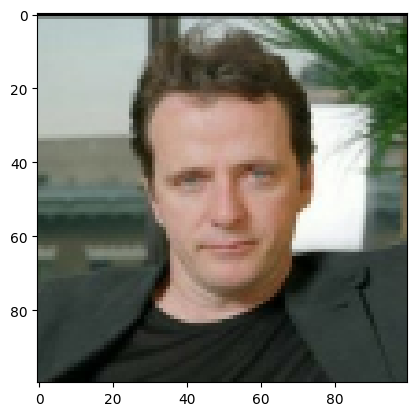

In [50]:
plt.imshow(samp[1])

In [51]:
# Unverified Image between Anchor and Image Shown Above - Indicates Correct Label
samp[2]

0.0

In [52]:
round(len(data)*.7)

416

In [53]:
# Defines 70 -30 split, train, test
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)

# Begins preprocessing the next batch of images so that bottlenecking when training does not occur
train_data = train_data.prefetch(8)

In [54]:
# Testing partition 
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

Model Engineering 

https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

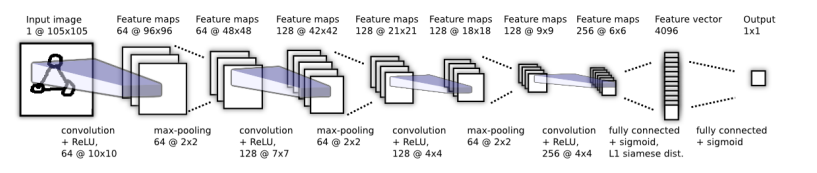

In [55]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')

    # First Block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    # Max value at a 2x2 matrix to condense the data
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    #Second Block 
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third Block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2) 
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3) 

    # Final embedding block 
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [56]:
embedding = make_embedding()

In [57]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

The distance layer will take 4096 feature vectors as the input and will effectively output a value that will be passed to a fully connected layer that wil result in 'verified' or 'unverified.' 

In [58]:
# Create a custom neural network layer 
class L1Dist(Layer): 
    def __init__(self, **kwargs): 
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        input_embedding = tf.convert_to_tensor(input_embedding)
        input_embedding = tf.squeeze(input_embedding, axis=0)  # Remove potential first dimension
        
        validation_embedding = tf.convert_to_tensor(validation_embedding)
        validation_embedding = tf.squeeze(validation_embedding, axis=0)
        
        return tf.math.abs(input_embedding - validation_embedding)

In [59]:
l1 = L1Dist()

In [60]:
# l1(anchor_embedding, validation_embedding)

In [61]:
# Create the Siamese Model 
def make_siamese_model(): 

    # Anchor Image in the network
    input_image = Input(name='input_img', shape=(100,100,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Combine siamese distance components
    siamese_layer = L1Dist() 
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # Classification Layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [62]:
siamese_model = make_siamese_model()

In [63]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_1 (L1Dist)            │ (None, 4096)              │               0 │ embedding[0][0],           │
│                               │                           │                 │ embedding[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

TrainingSet Up Loss Function and Optimizer Training Loop

In [64]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [66]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [68]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [69]:
test_batch = train_data.as_numpy_iterator()

In [70]:
batch_1 = test_batch.next()

In [71]:
X = batch_1[:2]

In [72]:
y = batch_1[2]

In [73]:
y

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

In [74]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

1. Make a prediction
2. Calculate loss
3. Derive gradients
4. Calculate new weights and apply

tf.GradientTape is a context manager in TensorFlow that records operations for automatic differentiation. This is particularly useful for implementing custom training loops or complex model updates

In [81]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass that makes a prediction 
        yhat = siamese_model(X, training=True)
        # Calculate loss (pass in the y_true, y_predicted
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [82]:
from tensorflow.keras.metrics import Precision, Recall

In [77]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        # updates progress bar as data is traversed 
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints every 10 epochs 
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [84]:
EPOCHS = 50

In [86]:
train(train_data, EPOCHS)


 Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

Evaluate the Model 

In [87]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [88]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


In [89]:
# Processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]

In [90]:
y_true

array([0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

In [91]:
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [92]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [93]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
0.9318182 1.0
